<a href="https://colab.research.google.com/github/aayush0828/PUBG-Finish-Placement-Prediction/blob/main/PUBG_dataset_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import lightgbm as lgb

warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.float_format = '{:,.3f}'.format
sns.set()

# **Train data**

## **Load dataset**

In [4]:
pubg_data = pd.read_csv("/content/train_V2.csv")
train = pubg_data

In [5]:
%%time
train.info()

# Memory usages in Bytes
print("Reduced Memory size: ",train.memory_usage(index=True).sum()/(1024*1024), "MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               14138 non-null  object 
 1   groupId          14138 non-null  object 
 2   matchId          14138 non-null  object 
 3   assists          14138 non-null  int64  
 4   boosts           14138 non-null  int64  
 5   damageDealt      14138 non-null  float64
 6   DBNOs            14138 non-null  int64  
 7   headshotKills    14138 non-null  int64  
 8   heals            14138 non-null  int64  
 9   killPlace        14138 non-null  int64  
 10  killPoints       14138 non-null  int64  
 11  kills            14138 non-null  int64  
 12  killStreaks      14138 non-null  int64  
 13  longestKill      14138 non-null  float64
 14  matchDuration    14138 non-null  int64  
 15  matchType        14138 non-null  object 
 16  maxPlace         14138 non-null  int64  
 17  numGroups   

In [6]:
# Memory usages in Bytes
print(train.memory_usage(index=True).sum()/(1024*1024), "MB")

3.1281890869140625 MB


# **Reducing Dataset Memory**

In [7]:
for column_name in train:
    if train[column_name].dtype=='float64':
        train[column_name] = pd.to_numeric(train[column_name], downcast= 'float')
    if train[column_name].dtype=='int64':
        train[column_name] = pd.to_numeric(train[column_name],downcast='integer')

In [8]:
%%time
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               14138 non-null  object 
 1   groupId          14138 non-null  object 
 2   matchId          14138 non-null  object 
 3   assists          14138 non-null  int8   
 4   boosts           14138 non-null  int8   
 5   damageDealt      14138 non-null  float32
 6   DBNOs            14138 non-null  int8   
 7   headshotKills    14138 non-null  int8   
 8   heals            14138 non-null  int8   
 9   killPlace        14138 non-null  int8   
 10  killPoints       14138 non-null  int16  
 11  kills            14138 non-null  int8   
 12  killStreaks      14138 non-null  int8   
 13  longestKill      14138 non-null  float32
 14  matchDuration    14138 non-null  int16  
 15  matchType        14138 non-null  object 
 16  maxPlace         14138 non-null  int8   
 17  numGroups   

In [9]:
# Memory usages in Bytes
print("Reduced Memory size: ",train.memory_usage(index=True).sum()/(1024*1024), "MB")

print("Data Description:")
train.describe().drop('count').T

Reduced Memory size:  1.29449462890625 MB
Data Description:


,mean,std,min,25%,50%,75%,max
assists,0.232,0.577,0.000,0.000,0.000,0.000,8.000
boosts,1.125,1.744,0.000,0.000,0.000,2.000,14.000
damageDealt,130.865,170.869,0.000,0.000,81.670,185.300,"2,325.000"
DBNOs,0.657,1.141,0.000,0.000,0.000,1.000,21.000
headshotKills,0.225,0.583,0.000,0.000,0.000,0.000,8.000
heals,1.388,2.694,0.000,0.000,0.000,2.000,29.000
killPlace,47.668,27.437,1.000,24.000,48.000,71.000,100.000
killPoints,506.553,627.308,0.000,0.000,0.000,"1,174.000","2,069.000"
kills,0.921,1.549,0.000,0.000,0.000,1.000,21.000
killStreaks,0.542,0.715,0.000,0.000,0.000,1.000,6.000


## **Number of NULL value in Data**

In [10]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

Here we can see there is only one null value for winPlacePerc feature, means it is an illegal match, hence we can drop that row as 1 row in compare to the size of the dataset won't affect the output!!

In [11]:
train.dropna(inplace=True)

**Dropping the Id column as it will be of no use**

In [12]:
train.drop(['Id'], axis=1, inplace=True)


In [13]:
labelencoder = LabelEncoder()


In [14]:
train['matchType'].value_counts()


matchType
squad-fpp           5567
duo-fpp             3164
squad               2012
solo-fpp            1740
duo                 1019
solo                 536
normal-squad-fpp      45
crashfpp              23
normal-duo-fpp        15
normal-solo-fpp        6
flaretpp               3
flarefpp               3
normal-squad           2
normal-duo             1
crashtpp               1
Name: count, dtype: int64

In [15]:
## So from the above there are many matchtypes with combination of fpp, tpp , solo, duo ,squad,etc.
## So we are generalizing them into only solo, duo and squad.
## After that applying LabelEncoding to matchType column

train['matchType'] = train['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad')

train['matchType'] = labelencoder.fit_transform(train['matchType'])
train['matchType'].value_counts()

matchType
2    7632
0    4223
1    2282
Name: count, dtype: int64

In [16]:
train1 = train.copy()
# train2 = train.copy()

# **EDA**

In [17]:
train1.columns


Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

## **Univariate Analysis**

### **Plotting graph for some of the discrete columns**

In [18]:
# Discrete Columns
dis_cols_1 = ['assists', 'boosts', 'heals', 'DBNOs', 'headshotKills', 'kills']
dis_cols_2 = ['killStreaks', 'revives', 'roadKills', 'teamKills', 'weaponsAcquired','vehicleDestroys']

def discreteGraph(dis_cols):
    fig = plt.figure(figsize = (20, 15))

    index = 1
    for col in dis_cols:
        plt.subplot(3, 2, index)
        sns.countplot(x=col, data=train1)
        index += 1
    plt.tight_layout()
    plt.show()

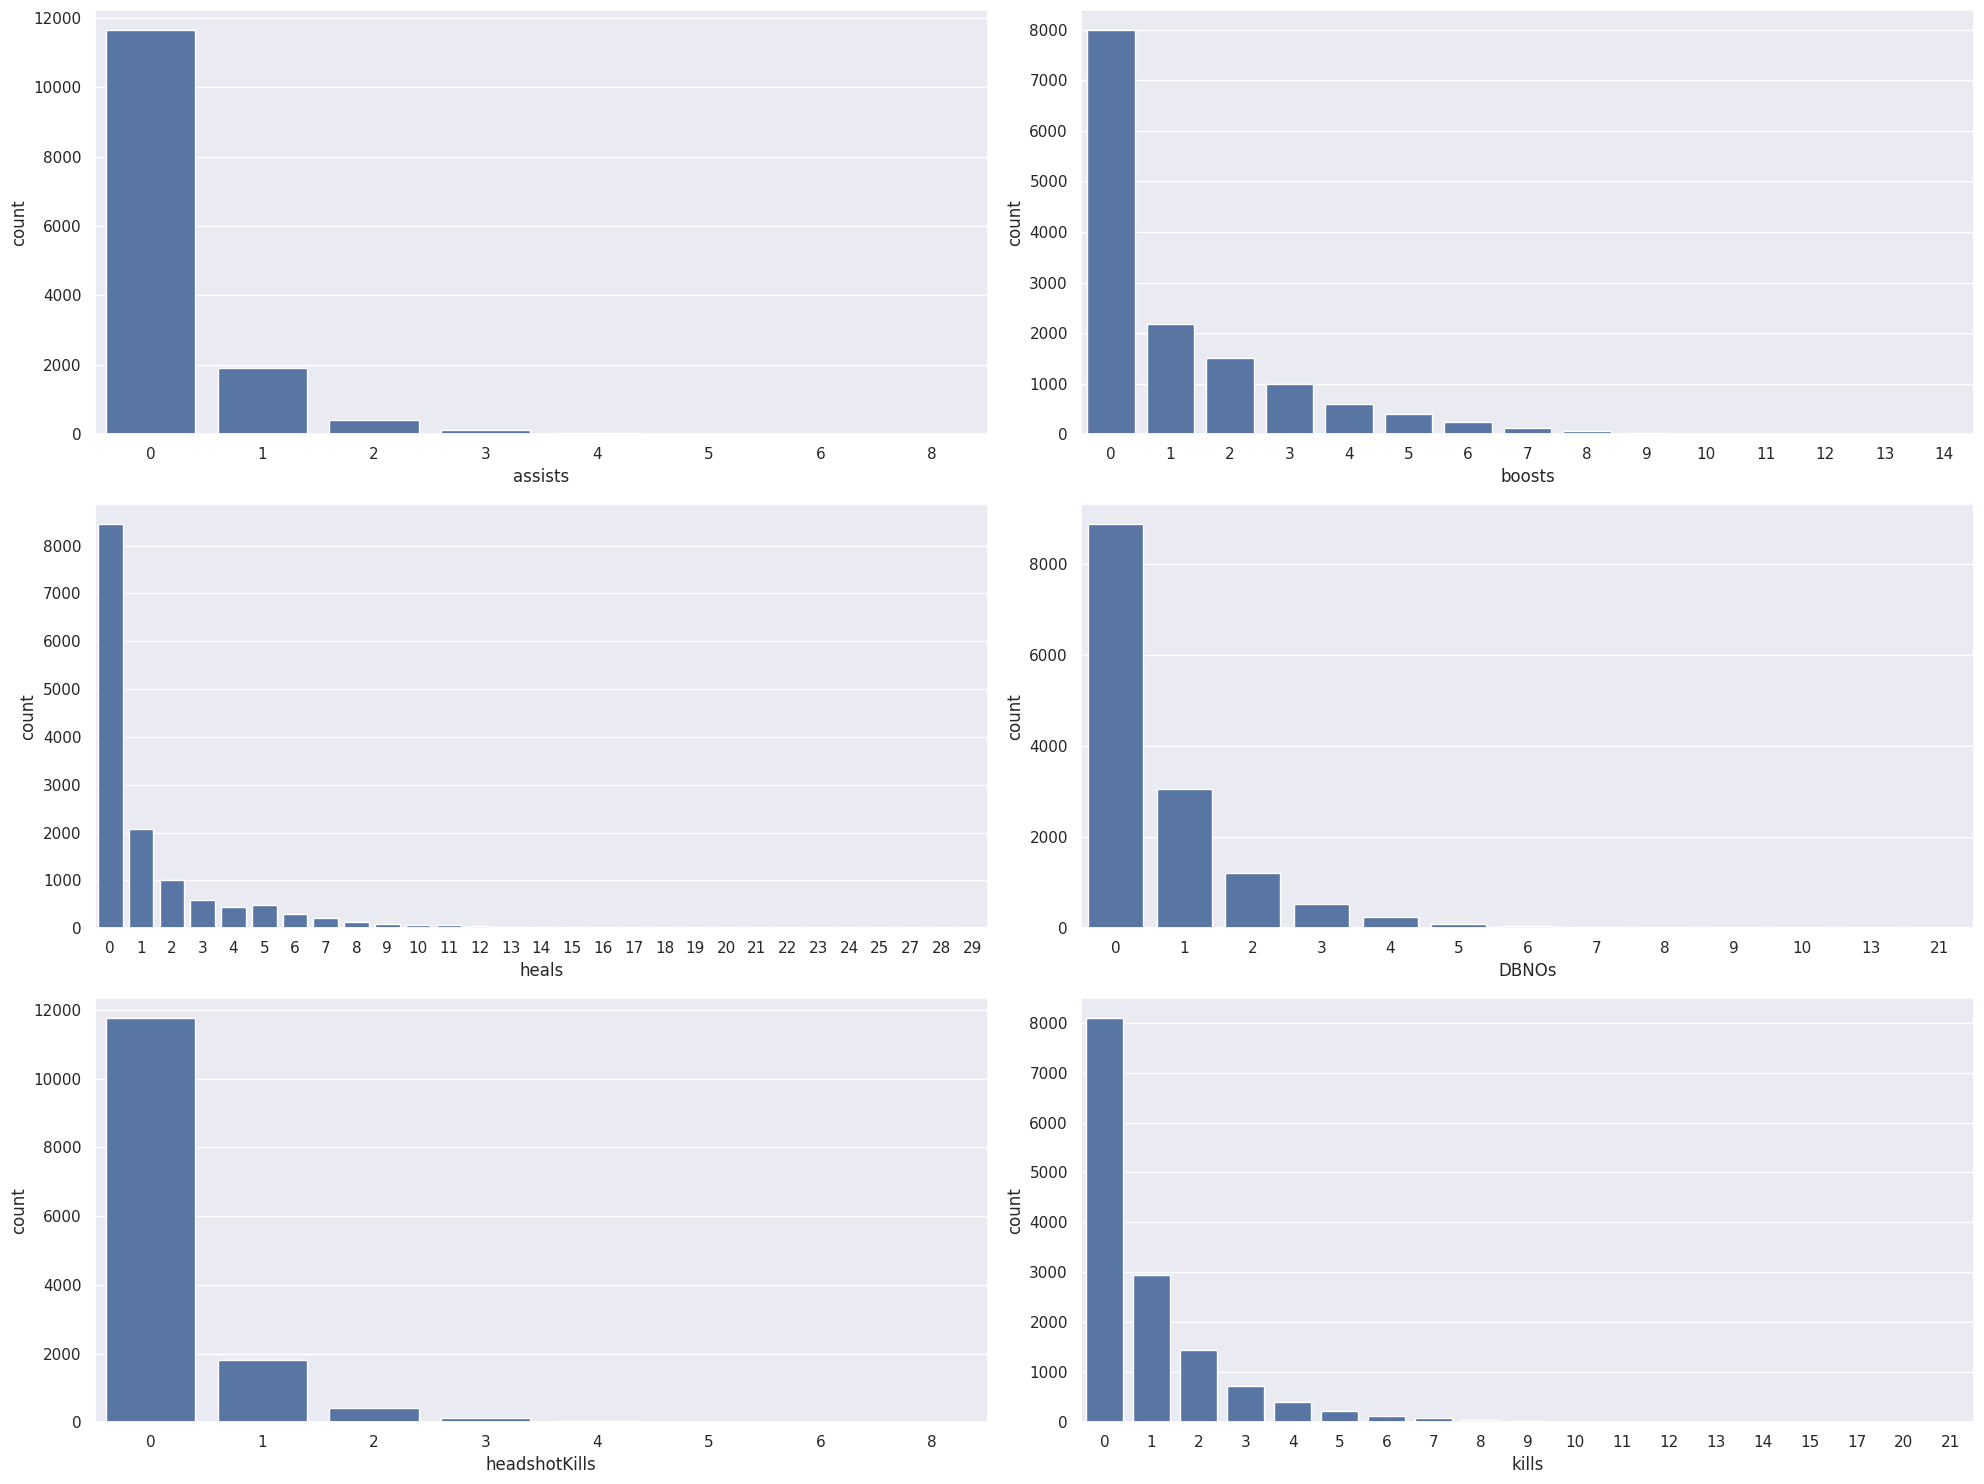

In [19]:
discreteGraph(dis_cols_1)


**Here from the graph we can see all the above feature have their most of the value lying in the zero region and their higher values graph are somewhat sparse on the basis of count.**

## **Player Types**

In [20]:
players = train1['matchType'].value_counts()
print("Squad Players  : ",players[2])
print("Duo Players  : ",players[0])
print("Solo Players  : ",players[1])
print("Total Players : ",players[0]+players[1]+players[2])

Squad Players  :  7632
Duo Players  :  4223
Solo Players  :  2282
Total Players :  14137


**So here we have the players as above distributed and the data consist of total 3112875 players**

# **Kills Analysis**

In [21]:
print("Kills")
print("99% of the players have kills less than or equal to", train1['kills'].quantile(0.99))
print("Whereas maximum kill is ", train1['kills'].max())
print("And the minimum kill is", train1['kills'].min())

Kills
99% of the players have kills less than or equal to 7.0
Whereas maximum kill is  21
And the minimum kill is 0


# **Continuous columns**

In [22]:
cont_dist = ['killPoints', 'longestKill', 'maxPlace', 'rankPoints', 'rideDistance',
             'swimDistance', 'walkDistance', 'winPoints', 'winPlacePerc']

In [24]:
train2 = train.copy()
train2 = train2.groupby(by=['groupId']).agg({'matchId':'max', 'assists':'sum', 'boosts':'sum','damageDealt':'sum', 'DBNOs':'sum',
                                            'headshotKills':'sum','heals':'sum', 'killPlace':'mean', 'killPoints':'max', 'kills':'sum',
                                            'killStreaks':'max','longestKill':'mean','matchDuration':'max', 'maxPlace':'mean','numGroups':'mean',
                                            'rankPoints' : 'max', 'matchType':'mean','revives':'sum','rideDistance':'max', 'roadKills':'sum',
                                            'swimDistance':'max','teamKills':'sum', 'vehicleDestroys':'sum', 'walkDistance':'max',
                                            'weaponsAcquired':'sum','winPoints':'max', 'winPlacePerc':'max'})

In [25]:
print("Memory Before :",(train1.memory_usage(index=True).sum()/(1024 * 1024)).round(2), " MB ")
print("Memory After : ", (train2.memory_usage(index=True).sum()/(1024 * 1024)).round(2), " MB ")

Memory Before : 1.29  MB 
Memory After :  1.46  MB 


Here we have significantly reduced the dataset memory, but is it legit ? lets see some plots and figure out


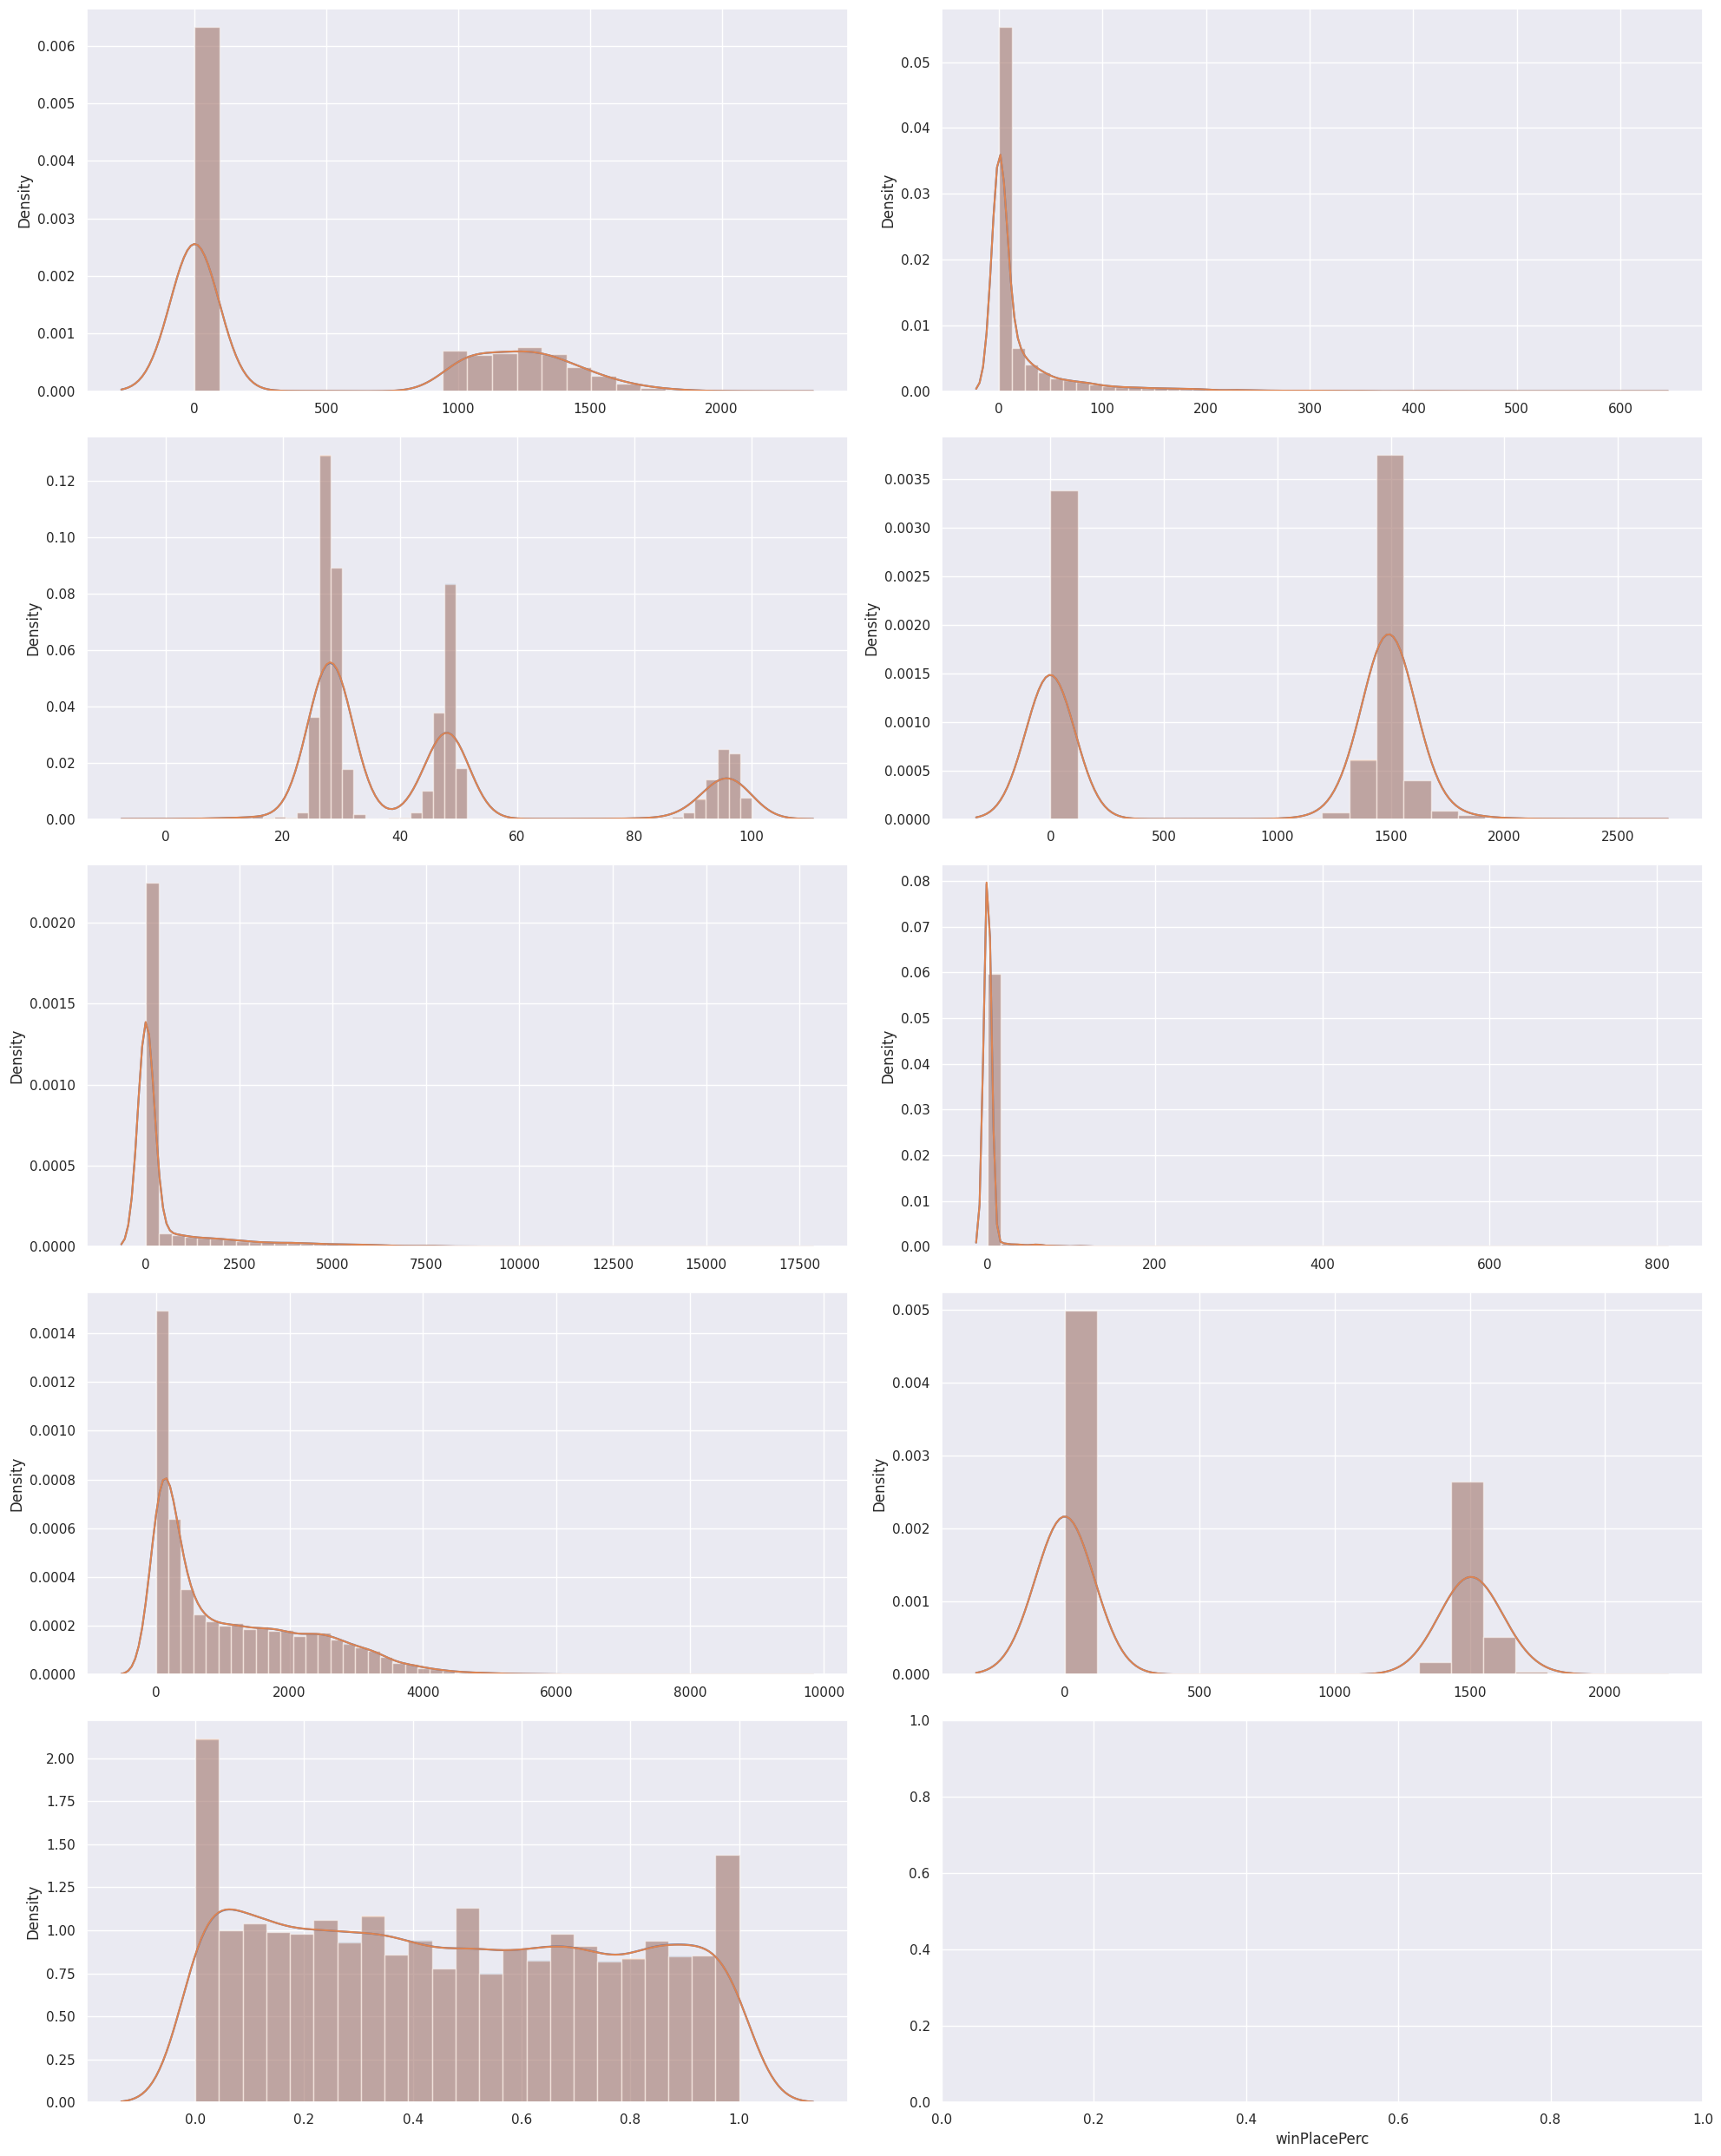

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
ind = 0
for i in range(5):
    for j in range(2):
        sns.distplot(train2, ax=axes[i, j], x = train2[cont_dist[ind]], kde = True)
        sns.distplot(train1, ax=axes[i, j], x = train1[cont_dist[ind]], kde = True)
        plt.xlabel(cont_dist[ind])
        ind += 1
        if(ind == len(cont_dist)):
            break
plt.tight_layout()
plt.show()

We have plotted density graph for the original dataset and the reduced dataset looks like the both distribution looks similar.
Also lets check the correlation of all the features with winPlacePerc before and after

# **Correlation Matrix**

In [29]:
# Select only numeric columns for the correlation calculation
train1_numeric = train1.select_dtypes(include=[np.number])
train2_numeric = train2.select_dtypes(include=[np.number])

# Calculate correlations
cor1 = pd.DataFrame()
cor1["Original Dataset"] = train1_numeric.corr()['winPlacePerc']
cor1["Reduced Dataset"] = train2_numeric.corr()['winPlacePerc']

print(cor1)


                 Original Dataset  Reduced Dataset
assists                     0.299            0.299
boosts                      0.633            0.632
damageDealt                 0.446            0.445
DBNOs                       0.280            0.280
headshotKills               0.288            0.288
heals                       0.429            0.428
killPlace                  -0.717           -0.718
killPoints                  0.002            0.002
kills                       0.424            0.423
killStreaks                 0.377            0.377
longestKill                 0.403            0.403
matchDuration              -0.002           -0.002
matchType                  -0.038           -0.038
maxPlace                    0.041            0.041
numGroups                   0.045            0.045
rankPoints                  0.024            0.024
revives                     0.239            0.238
rideDistance                0.340            0.340
roadKills                   0.0

Hence from the above result there is not much of difference of correlation of feature wih winPlacePerc too.

So going forward the reduced dataset can be a candidate for the training purpose

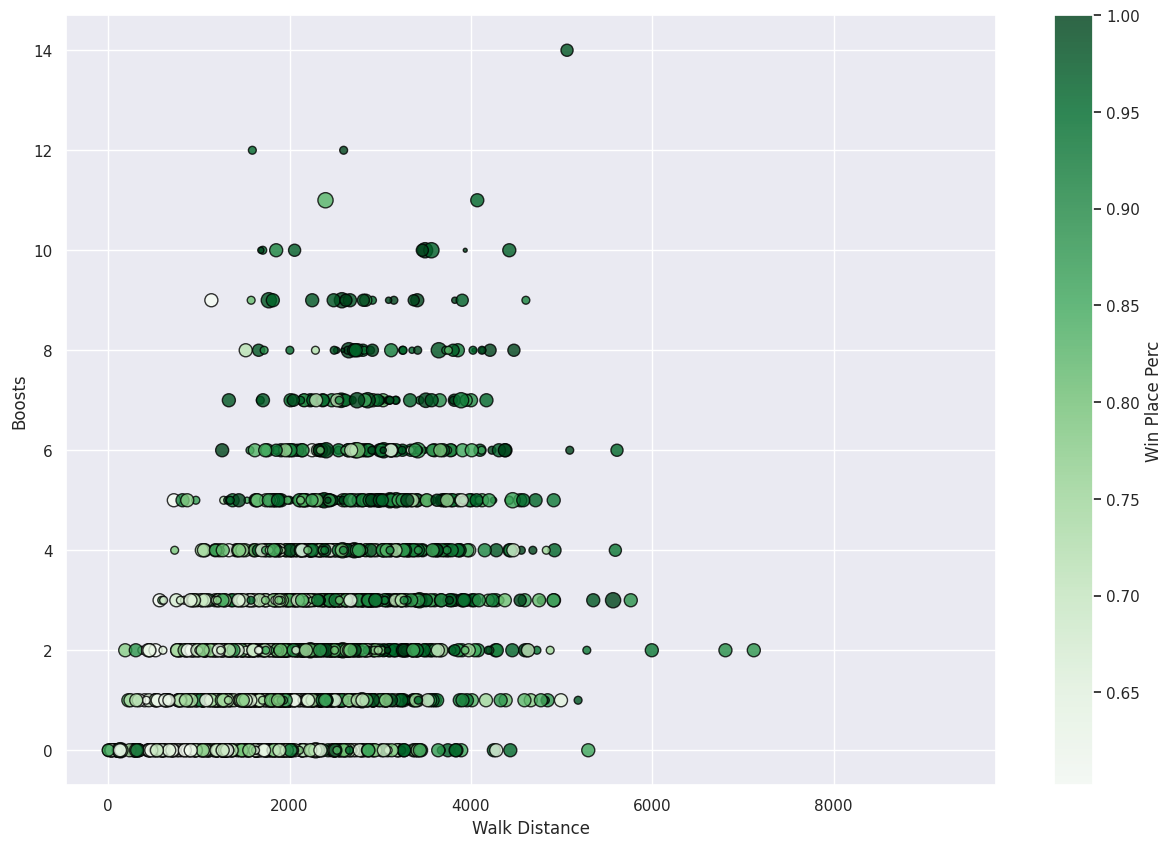

In [31]:
# Check the number of rows that meet the condition
num_rows = train2[train2['winPlacePerc'] > 0.6].shape[0]

# Sample the minimum of 100,000 or the available number of rows
sample_size = min(100000, num_rows)
temp1 = train2[train2['winPlacePerc'] > 0.6].sample(sample_size)

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(temp1['walkDistance'], temp1['boosts'], s=(temp1['kills'] + 5) * 100, c=temp1['winPlacePerc'], cmap='Greens', edgecolor='black', linewidth=1, alpha=0.8)
cbar = plt.colorbar()
cbar.set_label("Win Place Perc")
plt.xlabel("Walk Distance")
plt.ylabel("Boosts")
plt.show()


From the above graph we can observe that as boosts consumption increases players chance to win the match increases, also logically a player which has high chance of winning tends to be in fight and needs boost also we can see walkDistance also matters in winnning as it will be high for the player/team who has high chances of winning, because to be in the game players have to be in safe zone for that they need to travel.

Text(0, 0.5, 'Boosts')

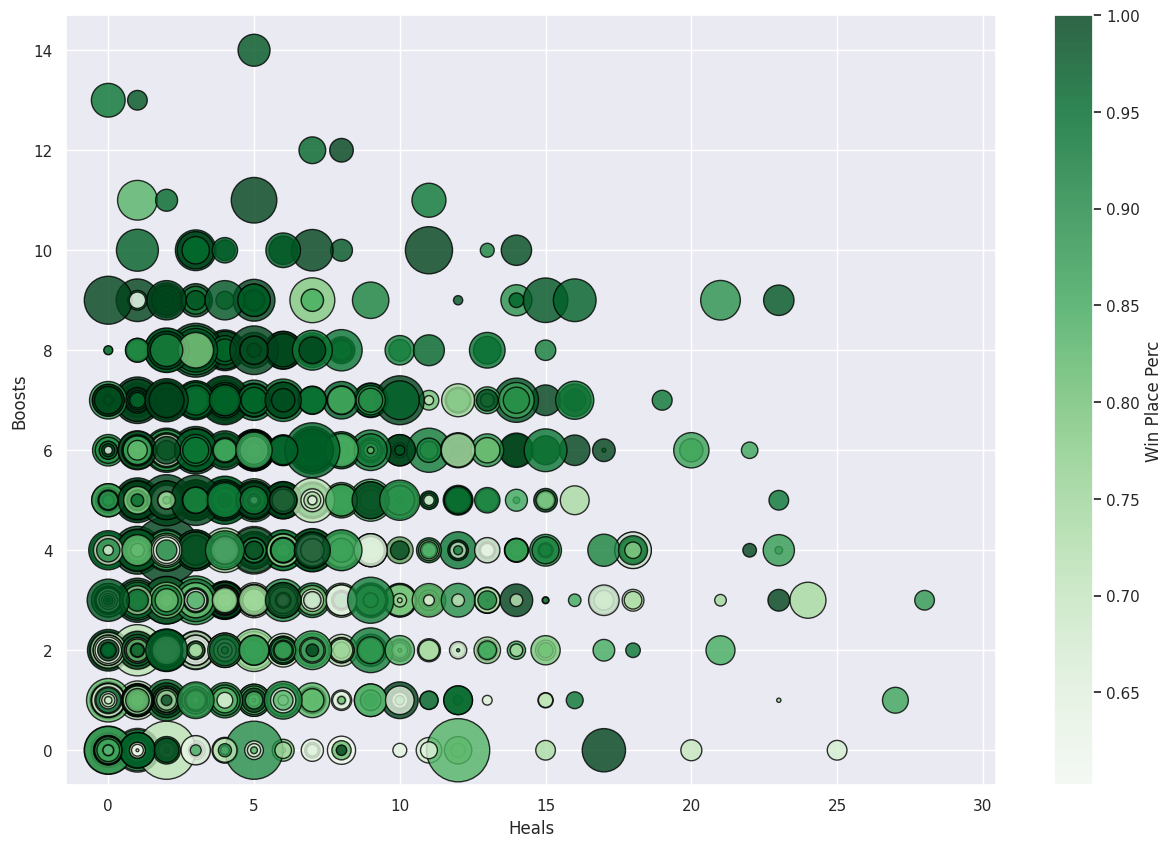

In [32]:
temp1 = train2[train2['winPlacePerc']>0.6].sample(5000)
plt.figure(figsize=(15, 10))
plt.scatter(temp1['heals'], temp1['boosts'], s=temp1['damageDealt'], c=temp1['winPlacePerc'], cmap='Greens', edgecolor='black', linewidth=1, alpha=0.8)
cbar = plt.colorbar()
cbar.set_label("Win Place Perc")
plt.xlabel("Heals")
plt.ylabel("Boosts")

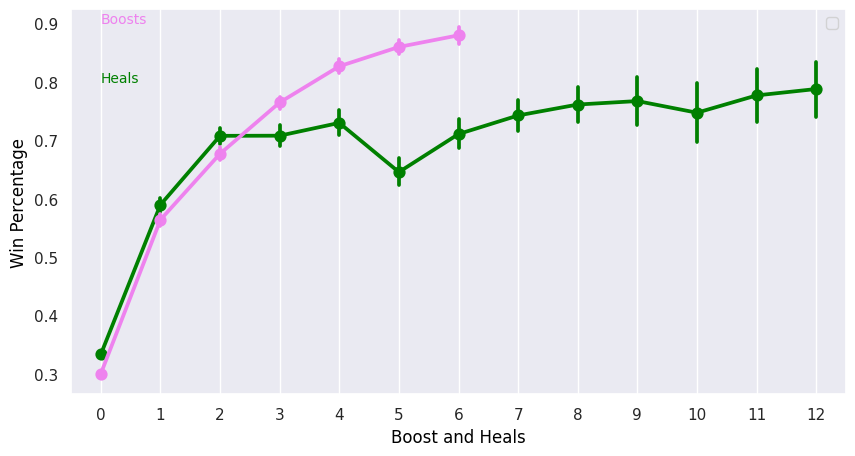

In [33]:
temp2 = train2[train2['heals'] < train2['heals'].quantile(0.99)]
temp2 = temp2[temp2['boosts'] < temp2['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(10,5))
sns.pointplot(x='heals',y='winPlacePerc',data=temp2,color='green')
sns.pointplot(x='boosts',y='winPlacePerc',data=temp2,color='violet')
plt.text(0,0.8,'Heals',color='green',fontsize = 10)
plt.text(0,0.9,'Boosts',color='violet',fontsize = 10)
plt.ylabel('Win Percentage', color='black')
plt.xlabel('Boost and Heals', color='black')
plt.grid()
plt.legend()

From the above graph we can see Boosts and Heals shows positive relation with winPlacePerc, Boosts shows more than Heal. Maybe we can do some stuff with both of these feature later

<Axes: xlabel='kills', ylabel='winPlacePerc'>

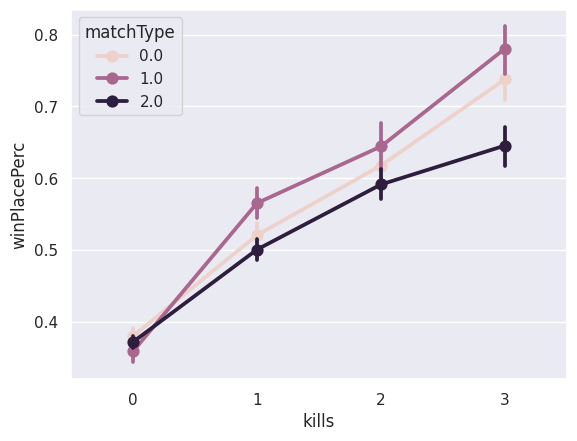

In [34]:
temp = train2[train2['kills'] <= train2['kills'].quantile(.9)]
sns.pointplot(x='kills',y='winPlacePerc',data=temp, hue='matchType')

# duo   - 0
# solo  - 1
# squad - 2

From the above graph we can say that as the number of kills increases chances of winning increases but it does not matter much as we go from match type from solo to squad, because in squad we have to play more strategically and focus is not much on kills in squad
While Analyzing the dataset we found some irregularities in the data, so handling those anomalies now

In [35]:
train4 = train2.copy()


## **1) Have done kills but have not travel any distance**

<Axes: xlabel='kills', ylabel='count'>

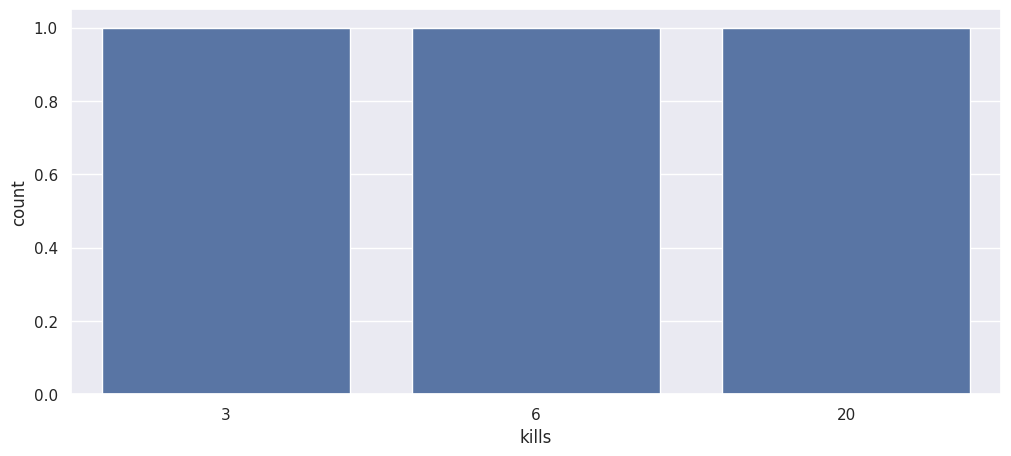

In [36]:
plt.figure(figsize=(12, 5))
sns.countplot(x='kills', data=train4[(train4['walkDistance'] + train4['rideDistance'] + train4['swimDistance']==0) & (train4['kills'] > 0)])

So the above graph is of the players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows!!

In [37]:
train4.drop(train4[(train4['walkDistance'] + train4['rideDistance'] + train4['swimDistance']==0) & (train4['kills'] > 0)].index, axis=0, inplace = True)


# **2)**

<Axes: xlabel='kills', ylabel='count'>

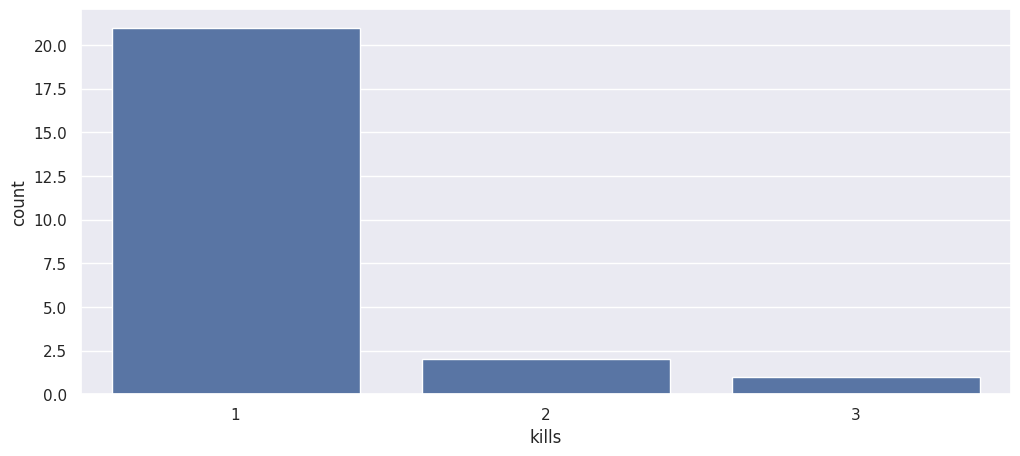

In [38]:
plt.figure(figsize=(12, 5))
sns.countplot(x='kills', data=train4[(train4['longestKill']==0) & (train4['kills'] > 0)])

So here we can see the longest kill is zero yet there are some non-zero kills, hence dropping those rows too!

In [39]:
index_drop = train4[(train4['longestKill']==0) & (train4['kills'] > 0)].index
train4.drop(index_drop,axis= 0,inplace= True)

# **3)**

<Axes: xlabel='teamKills', ylabel='count'>

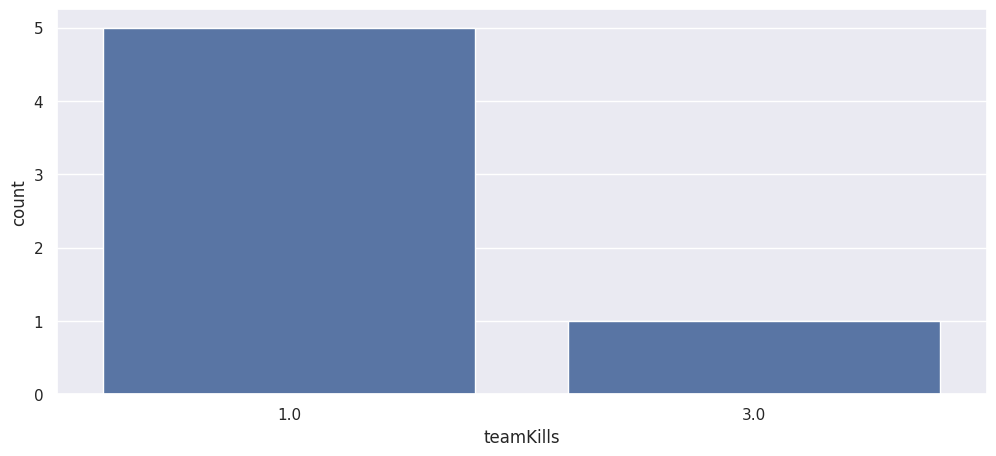

In [40]:
plt.figure(figsize=(12, 5))
sns.countplot(x='teamKills', data=train4[(train4['weaponsAcquired']==0) & (train4['teamKills']>0) & (train4['rideDistance']==0)])

### **In pubg, a player can kill his/her team-mate only if he has grenade(weapon) or he/she has drove a vehicle over his/her team-mate. But from the above condition graph there are some players who have killed teamplayer yet they have not acquire any weapon or drove a car/vehicle!!**

In [41]:
index_drop = train4[(train4['weaponsAcquired']==0) & (train4['teamKills']>0) & (train4['rideDistance']==0)].index
train4.drop(index_drop, axis=0, inplace = True)
print(len(index_drop), " rows dropped!!")

6  rows dropped!!


# **4)**

<Axes: xlabel='roadKills', ylabel='count'>

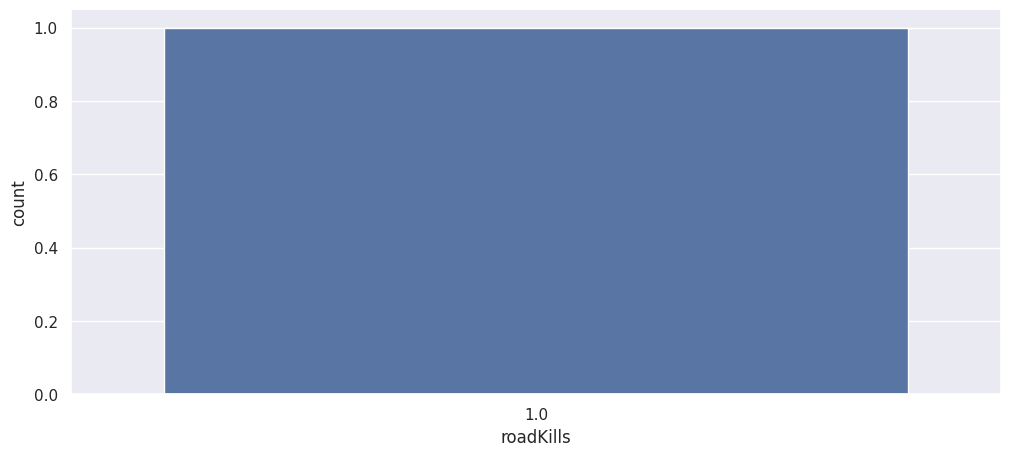

In [42]:
plt.figure(figsize=(12, 5))
sns.countplot(x='roadKills', data=train4[(train4['roadKills']>0) & (train4['rideDistance']==0)])

### **Killing players from the car but have not ride the car=> illegal data**

In [43]:
index_drop = train4[(train4['roadKills']>0) & (train4['rideDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(1,)


**5) Have not walked but have consumed heals and boost, its not possible**

In [44]:

index_drop = train4[((train4['heals']>0) | (train4['boosts']>0)) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(0,)


Similarly we have observed some more anamolies like as below:


6) Its not possible to acquire weapon if a player has not walked a distamce

In [45]:
index_drop = train4[(train4['weaponsAcquired']>0) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(53,)


7) If matchType is solo then there cannot be any assists value, because to assist we need teammate which we don't have, here as the number are somewhat high, so instead of dropping the rows, we imputed that feature with 0.

In [46]:
index_replace = train4[(train4['matchType']==1) & (train4['assists']>0)].index
print(index_replace.shape)
train4.loc[index_replace,'assists'] = 0

(118,)


8) A player cannot assist a teammate if the walkDistance is 0

In [47]:
index_drop = train4[(train4['assists']>0) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(0,)


9) A player cannot dealt damage if he has not walked a single meter

In [48]:
index_drop = train4[(train4['damageDealt']>0) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(4,)


# **Correlation Matrix**

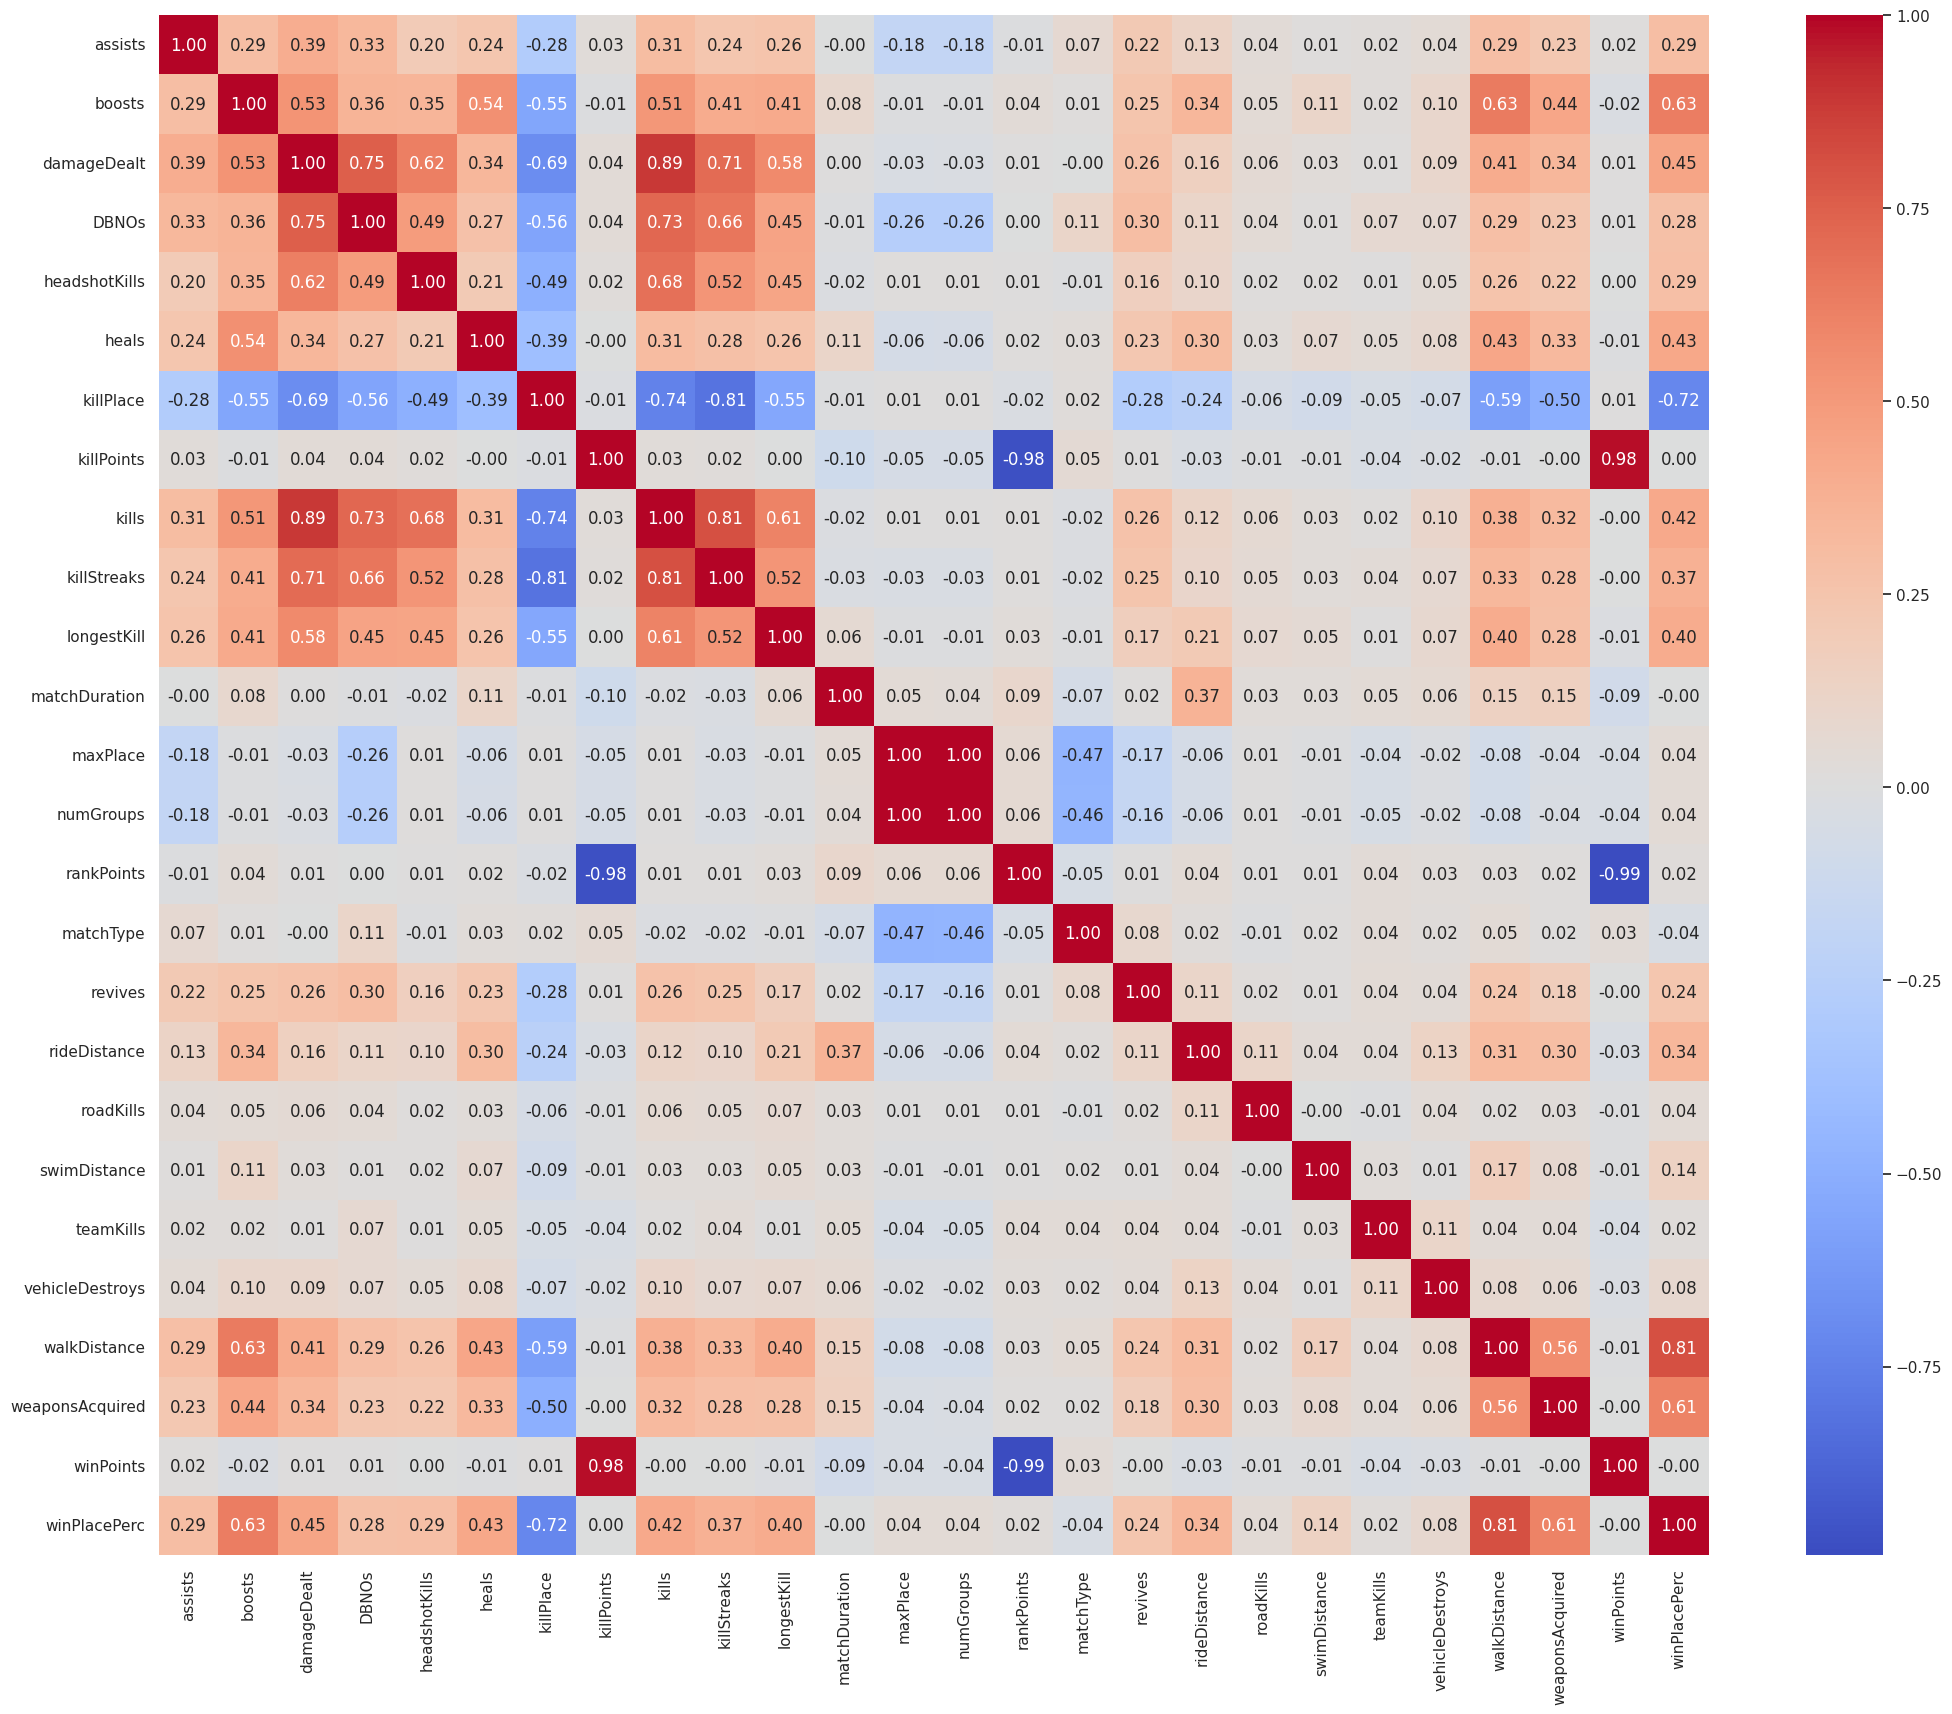

In [51]:
# Select only numeric columns for correlation computation
numeric_columns = train4.select_dtypes(include=[np.number])

# Create the heatmap
plt.subplots(figsize=(25, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [52]:
def getCorrelatedFeatures(corrdata, threshold):
    train_features = []
    train_value = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            train_features.append(index)
            train_value.append(corrdata[index])

    df = pd.DataFrame(data = train_value, index = train_features,columns = ['CorrValue'] )
    return df,train_features

In [55]:
# Select only numeric columns
train4_numeric = train4.select_dtypes(include=[np.number])

# Calculate correlations
correlation_matrix = train4_numeric.corr()
win_place_corr = correlation_matrix['winPlacePerc']


In [56]:
def getCorrelatedFeatures(corr_series, threshold):
    """ Get features correlated with 'winPlacePerc' above a given threshold.

    Parameters:
    - corr_series: Series containing correlation values with 'winPlacePerc'
    - threshold: correlation threshold for feature selection

    Returns:
    - corr_features: Dictionary of features and their correlation values
    - train_features: List of features above the threshold
    """
    corr_features = corr_series[abs(corr_series) > threshold]
    train_features = corr_features.index.tolist()
    return corr_features, train_features


In [57]:
# Set the correlation threshold
threshold = 0.4

# Get correlated features
corr_value, train_features = getCorrelatedFeatures(win_place_corr, threshold)

# Print results
print(corr_value)


boosts             0.633
damageDealt        0.446
heals              0.428
killPlace         -0.720
kills              0.423
longestKill        0.403
walkDistance       0.811
weaponsAcquired    0.606
winPlacePerc       1.000
Name: winPlacePerc, dtype: float64


# **Feature Engineering**

In [58]:
train5 = train4.copy()

In [59]:
def feature_engineering(train5):
    train5.insert(train5.shape[1]-1, 'killsPerMeter', train5['kills']/train5['walkDistance'])
    train5['killsPerMeter'].fillna(0, inplace=True)
    train5['killsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'healsPerMeter', train5['heals']/train5['walkDistance'])
    train5['healsPerMeter'].fillna(0, inplace=True)
    train5['healsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'totalHeals', train5['heals']+train5['boosts'])

    train5.insert(train5.shape[1]-1, 'totalHealsPerMeter', train5['totalHeals']/train5['walkDistance'])
    train5['totalHealsPerMeter'].fillna(0, inplace=True)
    train5['totalHealsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'totalDistance', train5['walkDistance']+train5['rideDistance']+train5['swimDistance'])
    train5['totalDistance'].fillna(0, inplace=True)
    train5['totalDistance'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'headshotRate', train5['headshotKills']/train5['kills'])
    train5['headshotRate'].fillna(0, inplace=True)
    train5['headshotRate'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'assistsAndRevives', train5['assists']+train5['revives'])

    train5.insert(train5.shape[1]-1, 'itemsAcquired', train5['heals']+train5['boosts']+train5['weaponsAcquired'])

    return train5

In [60]:
train5 = feature_engineering(train5)


In [62]:
# Check the data types of each column
non_numeric_cols = train5.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['matchId'], dtype='object')


In [63]:
# Convert columns to numeric if possible
for col in non_numeric_cols:
    train5[col] = pd.to_numeric(train5[col], errors='coerce')

# Check for any remaining non-numeric data
non_numeric_cols = train5.select_dtypes(exclude=[np.number]).columns
print("Remaining non-numeric columns:", non_numeric_cols)


Remaining non-numeric columns: Index([], dtype='object')


In [64]:
# Drop non-numeric columns
train5_numeric = train5.select_dtypes(include=[np.number])

# Check the new data
print(train5_numeric.head())


                matchId  assists  boosts  damageDealt  DBNOs  headshotKills  \
groupId                                                                       
0001456ea42933      NaN        0       2      715.300      0              1   
0011e8a19b2c3d      NaN        2       2      247.700      3              0   
001daf683e5ea6      NaN        0       0      242.700      2              0   
0020f2ef940fbc      NaN        1       4      300.500      2              0   
0024bdb4128fc7      NaN        0       0        0.000      0              0   

                heals  killPlace  killPoints  kills  ...  winPoints  \
groupId                                              ...              
0001456ea42933      1      3.000           0      6  ...      0.000   
0011e8a19b2c3d     13      9.000           0      3  ...      0.000   
001daf683e5ea6      1     62.000           0      0  ...      0.000   
0020f2ef940fbc     11     14.000           0      2  ...      0.000   
0024bdb4128fc7      

In [65]:
# Calculate correlations
correlation_matrix = train5_numeric.corr()
win_place_corr = correlation_matrix['winPlacePerc']
print(win_place_corr)


matchId              -0.085
assists               0.292
boosts                0.633
damageDealt           0.446
DBNOs                 0.279
headshotKills         0.288
heals                 0.428
killPlace            -0.720
killPoints            0.001
kills                 0.423
killStreaks           0.375
longestKill           0.403
matchDuration        -0.002
maxPlace              0.042
numGroups             0.045
rankPoints            0.025
matchType            -0.039
revives               0.237
rideDistance          0.340
roadKills             0.042
swimDistance          0.141
teamKills             0.021
vehicleDestroys       0.077
walkDistance          0.811
weaponsAcquired       0.606
winPoints            -0.004
killsPerMeter        -0.118
healsPerMeter         0.024
totalHeals            0.575
totalHealsPerMeter    0.056
totalDistance         0.674
headshotRate          0.180
assistsAndRevives     0.342
itemsAcquired         0.689
winPlacePerc          1.000
Name: winPlacePerc, 

# **Reformatting test data**

In [67]:
test = pd.read_csv("/content/test_V2.csv")
for column_name in test:
    if test[column_name].dtype=='float64':
        test[column_name] = pd.to_numeric(test[column_name], downcast= 'float')
    if test[column_name].dtype=='int64':
        test[column_name] = pd.to_numeric(test[column_name],downcast='integer')

In [69]:
# Convert all values to strings, replacing NaNs with a placeholder string
test['matchType'] = test['matchType'].astype(str).fillna('unknown')

# Verify data types and unique values
print(test['matchType'].dtype)
print(test['matchType'].unique())


object
['squad-fpp' 'duo-fpp' 'squad' 'solo-fpp' 'solo' 'duo' 'normal-squad-fpp'
 'crashtpp' 'normal-duo-fpp' 'crashfpp' 'normal-duo' 'flaretpp'
 'normal-solo-fpp' 'normal-solo' 'flarefpp' 'normal-squad' 'nan']


In [70]:
from sklearn.preprocessing import LabelEncoder

# Define the function to map match types
def map_match_type(x):
    if 'solo' in x:
        return 'solo'
    elif 'duo' in x or 'crash' in x:
        return 'duo'
    else:
        return 'squad'

# Apply the function to the matchType column
test['matchType'] = test['matchType'].apply(map_match_type)

# Encode the matchType column
labelencoder = LabelEncoder()
test['matchType'] = labelencoder.fit_transform(test['matchType'])

# Check the value counts of the encoded matchType
print(test['matchType'].value_counts())


matchType
2    496071
0    281155
1    150567
Name: count, dtype: int64


In [71]:
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))
mapping

{'duo': 0, 'solo': 1, 'squad': 2}

In [73]:
test1 = test.groupby(by=['groupId']).agg({'matchId':'max', 'assists':'sum', 'boosts':'sum','damageDealt':'sum', 'DBNOs':'sum',
                                            'headshotKills':'sum','heals':'sum', 'killPlace':'mean', 'killPoints':'max', 'kills':'sum',
                                            'killStreaks':'max','longestKill':'mean','matchDuration':'max', 'maxPlace':'mean','numGroups':'mean',
                                            'rankPoints' : 'max', 'matchType':'mean','revives':'sum','rideDistance':'max', 'roadKills':'sum',
                                            'swimDistance':'max','teamKills':'sum', 'vehicleDestroys':'sum', 'walkDistance':'max',
                                            'weaponsAcquired':'sum','winPoints':'max'})

In [74]:
test1 = test1.reset_index()


In [75]:
test2 = test1.copy()

def fea_eng_test(test2):
    test2.insert(test2.shape[1], 'killsPerMeter', test2['kills']/test2['walkDistance'])
    test2['killsPerMeter'].fillna(0, inplace=True)
    test2['killsPerMeter'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'healsPerMeter', test2['heals']/test2['walkDistance'])
    test2['healsPerMeter'].fillna(0, inplace=True)
    test2['healsPerMeter'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'totalHeals', test2['heals']+test2['boosts'])

    test2.insert(test2.shape[1], 'totalHealsPerMeter', test2['totalHeals']/test2['walkDistance'])
    test2['totalHealsPerMeter'].fillna(0, inplace=True)
    test2['totalHealsPerMeter'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'totalDistance', test2['walkDistance']+test2['rideDistance']+test2['swimDistance'])
    test2['totalDistance'].fillna(0, inplace=True)
    test2['totalDistance'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'headshotRate', test2['headshotKills']/test2['kills'])
    test2['headshotRate'].fillna(0, inplace=True)
    test2['headshotRate'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'assistsAndRevives', test2['assists']+test2['revives'])

    test2.insert(test2.shape[1], 'itemsAcquired', test2['heals']+test2['boosts']+test2['weaponsAcquired'])

    return test2

In [76]:
test2 = fea_eng_test(test2)


# **LightGBM Model**

In [78]:
# Check columns in train5
print("Columns in train5:", train5.columns)

# Drop columns if they exist
X = train5.drop(['groupId', 'matchId', 'winPlacePerc'], axis=1, errors='ignore')
y = train5['winPlacePerc']

# Check the resulting DataFrame
print("Features (X):")
print(X.head())

print("Target (y):")
print(y.head())


Columns in train5: Index(['matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints',
       'matchType', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'killsPerMeter', 'healsPerMeter', 'totalHeals',
       'totalHealsPerMeter', 'totalDistance', 'headshotRate',
       'assistsAndRevives', 'itemsAcquired', 'winPlacePerc'],
      dtype='object')
Features (X):
                assists  boosts  damageDealt  DBNOs  headshotKills  heals  \
groupId                                                                     
0001456ea42933        0       2      715.300      0              1      1   
0011e8a19b2c3d        2       2      247.700      3              0     13   
001daf683e5ea6        0       0      242.700      2              0    

In [79]:
def model_train(model,Xt_train,Xt_test,yt_train, yt_test):
    model.fit(Xt_train,yt_train)
    score= model.score(Xt_train,yt_train)
    y_pred = model.predict(Xt_test)
    mse = mean_squared_error(yt_test, y_pred)
    print("MSE: {0:.6f}".format(mse))
    print("Training Score:{0:.6f}".format(score))

In [80]:
lgbm_for_reg= LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_depth=30,
              min_split_gain=0.00015, n_estimators=250, num_leaves=2200,reg_alpha=0.1, reg_lambda=0.001, subsample=0.8,
              subsample_for_bin=45000, n_jobs =-1, max_bin =700, num_iterations=5100, min_data_in_bin = 12)

# **Importanat Parameter**

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

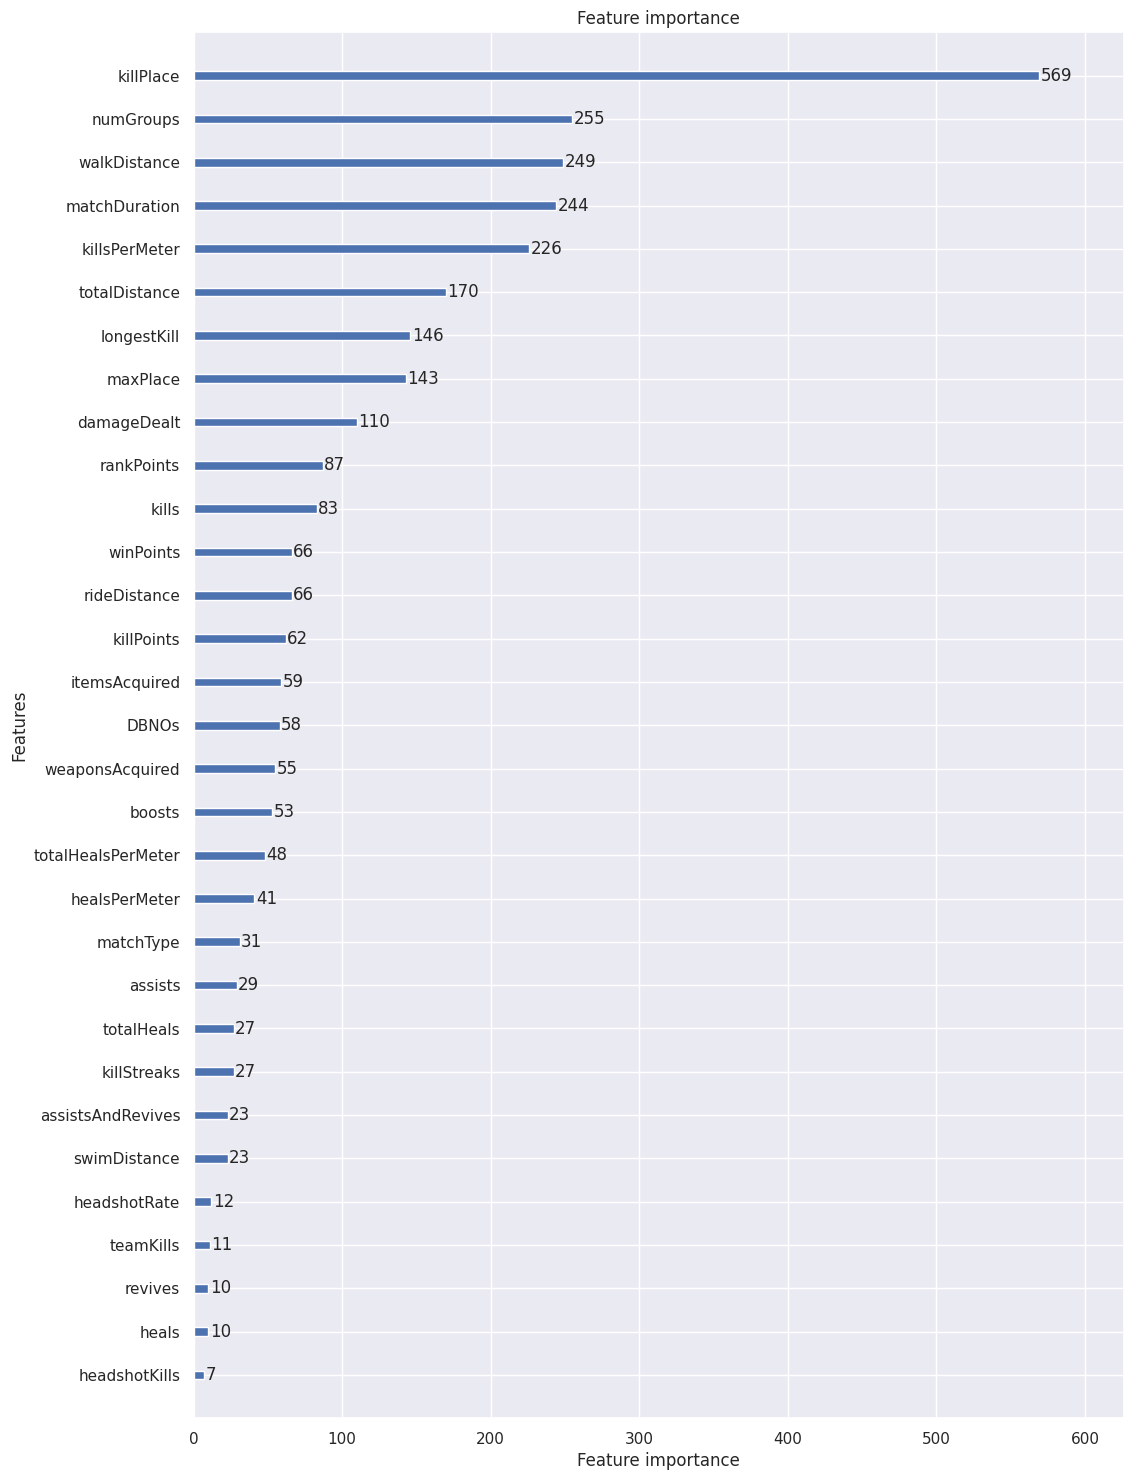

In [96]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(lgbm_for_reg, max_num_features=50,ax=ax)

# **Pridiction of Test dataset**

In [97]:
test2 = test2.drop(['groupId', 'matchId'], axis=1)


In [98]:
ypred = lgbm_for_reg.predict(test2)


# **Reformatting of test data**

In [99]:
def submitFormat(test, ypred):
    res = test[['Id', 'groupId']]
    res = res.groupby(by=['groupId']).agg(list)
    res['winPlacePerc'] = ypred.tolist()
    res = res.explode('Id')
    res.reset_index(inplace = True)
    res = res[['Id','winPlacePerc']]
    res['winPlacePerc'].round(decimals = 3)
    return res

In [100]:
res = submitFormat(test, ypred)


In [101]:
res["winPlacePerc"] = np.where(res["winPlacePerc"] <0, 0, res["winPlacePerc"])
res["winPlacePerc"] = np.where(res["winPlacePerc"] >1, 1, res["winPlacePerc"])

In [102]:
res


,Id,winPlacePerc
0,91fce235ef7633,0.687
1,34a29404226c8c,0.687
2,b3c0c8dca728eb,0.312
3,5e4734edf9c446,0.824
4,0e5c2c4bc52f26,0.556
...,...,...
927788,639cc41bbb129d,0.254
927789,e6cd7821bf4705,0.294
927790,39206587df1101,0.080
927791,be817d15887a5b,0.088


# **Generate submission File**

In [103]:
res.to_csv("submission.csv", index=False)
